In [1]:
import numpy as np
import torch
import opt_einsum

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from matplotlib import rc
rc('font',**{'family':'normal','size':26,'weight':'bold'})
rc('text', usetex=True)

import utils
import cvxpy_caller
import process_matrix
import error_schemes
import qec_schemes

import importlib
importlib.reload(utils)
importlib.reload(process_matrix)
importlib.reload(cvxpy_caller)
importlib.reload(error_schemes)
importlib.reload(qec_schemes)

<module 'qec_schemes' from '/Users/jamesmcgreivy/Desktop/convex-quantum-error-correction/qec_schemes.py'>

In [2]:
# might expect a stable range as the error rate approaches zero you'll approach this optimal code
# look into enforcing sparsity of Krauss operators

In [3]:
def fidelity_vs_error(qec, error_scheme):
    fids = []
    errors = np.linspace(0, 0.5, 20)
    for e in errors:
        X_E = error_scheme(int(np.log2(qec["X_C"].shape[0])), e)
        fid = utils.compute_fidelity(X_C=qec["X_C"], X_E=X_E, X_D=qec["X_D"]).item()
        fids.append(fid)
    return errors, np.array(fids)

In [4]:
unprotected_qubit = qec_schemes.nothing()

In [5]:
stabilizer_5 = qec_schemes.five_qubit_qec()

In [6]:
stabilizer_3 = qec_schemes.three_qubit_bitflip_qec()

In [7]:
error_model = [error_schemes.AD(q=7, l=0.01), error_schemes.AD(q=7, l=0.02)]
cvx_7 = qec_schemes.convex_optimizer_qec(1, 7, error_model)

0.9911254919018833
0.9908659527017173


KeyboardInterrupt: 

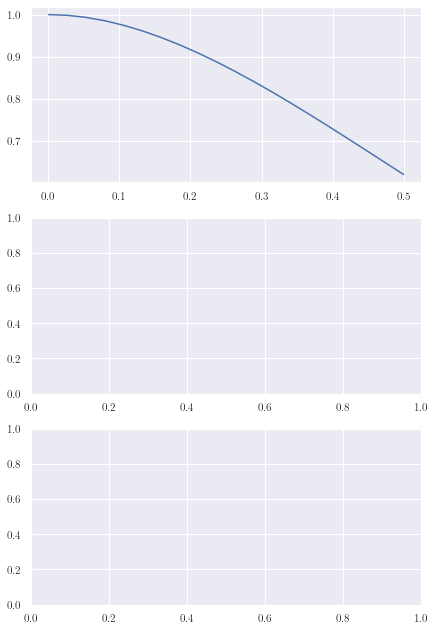

In [11]:
fig, axs = plt.subplots(3,1, figsize = (7,11))

axs[0].plot(*fidelity_vs_error(stabilizer_5, error_schemes.AD), label = "5 qubit stabilizer")
axs[0].plot(*fidelity_vs_error(cvx_7, error_schemes.AD), label = "Convex Optimized QEC")
axs[0].plot(*fidelity_vs_error(unprotected, error_schemes.AD), label = "Single Qubit")
axs[0].set_xlim(0, 0.25)
axs[0].set_ylim(0.75, 1.05)
axs[0].set_xlabel("$f_{avg}$")
axs[0].set_ylabel("$\lambda$")
axs[0].set_title("Avg fidelity against amplitude damping channel")
axs[0].legend()

axs[1].plot(*fidelity_vs_error(stabilizer_5, error_schemes.depolarizing), label = "5 qubit stabilizer")
axs[1].plot(*fidelity_vs_error(cvx_7, error_schemes.depolarizing), label = "Convex Optimized QEC")
axs[1].plot(*fidelity_vs_error(unprotected, error_schemes.depolarizing), label = "Single Qubit")
axs[1].set_xlim(0, 0.25)
axs[1].set_ylim(0.75, 1.05)
axs[1].set_xlabel("$f_{avg}$")
axs[1].set_ylabel("$\lambda$")
axs[1].set_title("Avg fidelity against depolarizing channel")
axs[1].legend()

axs[2].plot(*fidelity_vs_error(stabilizer_5, error_schemes.dephasing), label = "5 qubit stabilizer")
axs[2].plot(*fidelity_vs_error(cvx_7, error_schemes.dephasing), label = "Convex Optimized QEC")
axs[2].plot(*fidelity_vs_error(unprotected, error_schemes.dephasing), label = "Single Qubit")
axs[2].set_xlim(0, 0.25)
axs[2].set_ylim(0.75, 1.05)
axs[2].set_xlabel("$f_{avg}$")
axs[2].set_ylabel("$\lambda$")
axs[2].set_title("Avg fidelity against dephasing channel")
axs[2].legend()

plt.tight_layout()

#plt.savefig("avg_fid_all_vs_gad", dpi = 300)